In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

In [3]:
#get number of rows and columns
df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

#make a list of numbers that equal the length of the number of average instances
count = list()
counter = 0

while (counter < len(df['Average'])):
    count.append([counter])
    counter = counter + 1

In [4]:
#convert the average to a list
averages = df['Average'].tolist()

In [5]:
#-------------------- Create 3 Support Vector Regression Models -----------

#1. Create and train a SVR model using linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(count, averages)

#2. Create and train a SVR model using polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree= 2)
poly_svr.fit(count, averages)

#3. Create and train a SVR model using RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(count, averages)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

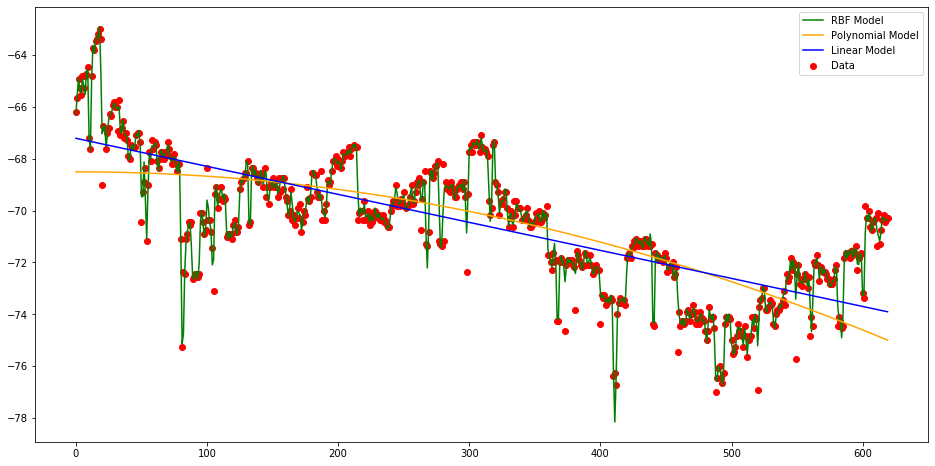

In [6]:
#Plot the models on the graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(count, averages, color='red', label = 'Data')
plt.plot(count, rbf_svr.predict(count), color='green', label='RBF Model')
plt.plot(count, poly_svr.predict(count), color='orange', label='Polynomial Model')
plt.plot(count, lin_svr.predict(count), color='blue', label='Linear Model')
plt.legend()
plt.show()

In [9]:
#Show the predicted Average RSSI value on the given time step
timestep = [[610]]

print('The RBF SVR model predicted', rbf_svr.predict(timestep))
print('The Linear SVR model predicted', lin_svr.predict(timestep))
print('The Polynomial SVR model predicted', poly_svr.predict(timestep))

The RBF SVR model predicted [-70.37300292]
The Linear SVR model predicted [-73.80411492]
The Polynomial SVR model predicted [-74.80790557]


In [10]:
print('The actual RSSI value:', df['Average'][610])

The actual RSSI value: -70.27272727272727
